In [6]:
# Creating an new Jupyter notebook and starting from scratch for the sake of this lab

#0 Get the data

import pandas as pd
import numpy as np

marketing = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

marketing.shape

(9134, 24)

In [7]:
#1 Show DataFrame info.

marketing.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [8]:
#2a Describe DataFrame. NUMERIC
data_numeric = marketing.describe().T 
data_numeric = data_numeric.apply(lambda x: round(x ,2))
data_numeric

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
Income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
Monthly Premium Auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
Months Since Last Claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
Months Since Policy Inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
Number of Open Complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of Policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
Total Claim Amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


In [9]:
#2b Describe DataFrame. OBJECT
data_object = marketing.describe(include=[object]).T 
data_object

,count,unique,top,freq
Customer,9134,9134,AU45793,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


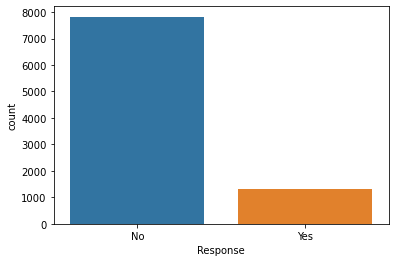

In [36]:
#3 Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x = 'Response', data = marketing)
plt.show()


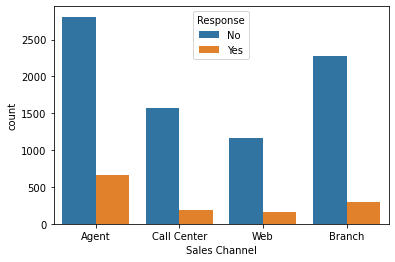

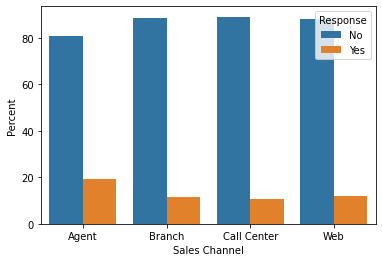

In [95]:
#4 Show a plot of the response rate by the sales channel.

# I started with this, but then realized this is a count and not the rate so had to find a way to convert these bars to rates.
sns.countplot(x = 'Sales Channel', hue = 'Response', data = marketing)
plt.show()

#The answer came from a Medium article (https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb)
# where this code was presented & I slightly modified it to fit the purpose here:
resp_by_sc = marketing.groupby('Sales Channel')['Response'].value_counts(normalize=True)
resp_by_sc = resp_by_sc.mul(100).rename('Percent').reset_index()
resp_by_sc
#The only operation I do not fully understand is the .reset_index() in terms of the columns, we can maybe go through data in the class

sns.barplot(x = 'Sales Channel', y = 'Percent', hue = 'Response', data = resp_by_sc)
plt.show()

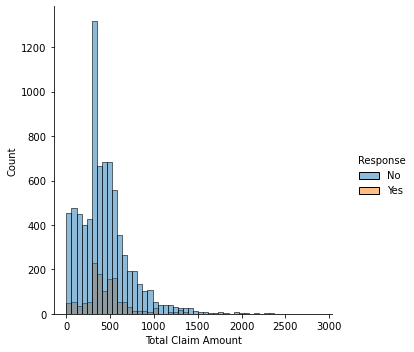

In [112]:
#5 Show a plot of the response rate by the total claim amount.

sns.displot(x='Total Claim Amount', hue = 'Response', data = marketing, bins = 50)
plt.show()

# Observations: very high number of responses around 25-300 total claim amount area, with a super low positive response rate 
# = we might need to understand the reason for it. Otherwise, the response rate is pretty uniform across different levels of TCA

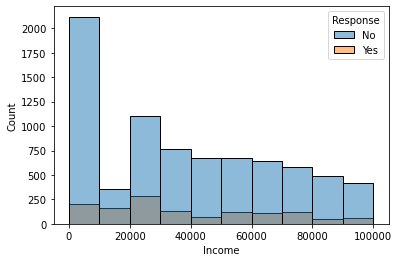

In [111]:
#6 Show a plot of the response rate by income.

sns.histplot(x='Income', hue = 'Response', data = marketing, bins = 10)
plt.show()

# 0 income category with super low positive response rate, might not be targeted in future to reduce costs. 10k-20k group with ultra-high response rate
#, need to understand the reasons for that.